In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

lat_cities = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat_cities.append(lat_lng[0])
        
# Print the city count to confirm sufficient count
print(len(cities))

625


## Perform API Calls

In [45]:
# OpenWeatherMap API Key

unit="imperial"
# Starting URL for Weather Map API Call
temps = []
humid = []
cloud = []
wind = []
test_cities = cities[:20]
test_lat = lat_cities[:20]
end_cities = []
end_lats = []
for city in cities:
    
    url = "https://api.openweathermap.org/data/2.5/weather?q=" + city +"&units="+ unit+"&APPID=" + api_key 
    response = requests.get(url).json()
    print(f"Processing City {cities.index(city)} : {city} info")
    try:
        temps.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        end_cities.append(city)
        end_lats.append(lat_cities[cities.index(city)])
    except:
        print('missing data, continuing')
        
        
#remove missing cities        
city_weather = pd.DataFrame(end_cities)
city_weather['Temp'] = temps
city_weather['Humidity'] = humid
city_weather['Cloudiness'] = cloud
city_weather['Wind Speed'] = wind
city_weather['Latitudes'] = end_lats
city_weather.head()

Processing City 0 : kodinar info
Processing City 1 : glenwood springs info
Processing City 2 : aflu info
missing data, continuing
Processing City 3 : olafsvik info
missing data, continuing
Processing City 4 : vaini info
Processing City 5 : avarua info
Processing City 6 : takoradi info
Processing City 7 : esperance info
Processing City 8 : zonguldak info
Processing City 9 : rikitea info
Processing City 10 : lebu info
Processing City 11 : bluff info
Processing City 12 : punta arenas info
Processing City 13 : castro info
Processing City 14 : new norfolk info
Processing City 15 : teneguiban info
missing data, continuing
Processing City 16 : longyearbyen info
Processing City 17 : hilo info
Processing City 18 : rawson info
Processing City 19 : iquitos info
Processing City 20 : carnarvon info
Processing City 21 : klaksvik info
Processing City 22 : namatanai info
Processing City 23 : cape town info
Processing City 24 : busselton info
Processing City 25 : geraldton info
Processing City 26 : nom

Processing City 212 : belushya guba info
missing data, continuing
Processing City 213 : boizenburg info
Processing City 214 : gigmoto info
Processing City 215 : hobyo info
Processing City 216 : atka info
missing data, continuing
Processing City 217 : kattivakkam info
Processing City 218 : isangel info
Processing City 219 : hasaki info
Processing City 220 : rusape info
Processing City 221 : khatanga info
Processing City 222 : walvis bay info
Processing City 223 : hamilton info
Processing City 224 : clyde river info
Processing City 225 : victoria info
Processing City 226 : junagarh info
Processing City 227 : terenga info
missing data, continuing
Processing City 228 : saint-philippe info
Processing City 229 : boueni info
Processing City 230 : yerbogachen info
Processing City 231 : kirchzarten info
Processing City 232 : dingle info
Processing City 233 : khani info
Processing City 234 : marga info
Processing City 235 : vardo info
Processing City 236 : zvishavane info
Processing City 237 : a

Processing City 421 : dargaville info
Processing City 422 : sabang info
Processing City 423 : sola info
Processing City 424 : san cristobal info
Processing City 425 : najran info
Processing City 426 : phek info
Processing City 427 : namibe info
Processing City 428 : mercedes info
Processing City 429 : nishihara info
Processing City 430 : grindavik info
Processing City 431 : fianga info
missing data, continuing
Processing City 432 : lima info
Processing City 433 : douglas info
Processing City 434 : college info
Processing City 435 : soe info
Processing City 436 : male info
Processing City 437 : tungor info
Processing City 438 : gorom-gorom info
Processing City 439 : tamworth info
Processing City 440 : sinkat info
missing data, continuing
Processing City 441 : donzdorf info
Processing City 442 : santiago del estero info
Processing City 443 : kudal info
Processing City 444 : kerman info
Processing City 445 : belfast info
Processing City 446 : coahuayana info
Processing City 447 : hailey i

,0,Temp,Humidity,Cloudiness,Wind Speed,Latitudes
0,kodinar,76.24,97,92,13.56,18.051223
1,glenwood springs,80.22,33,1,5.82,39.002241
2,vaini,68.59,98,92,6.96,-33.955244
3,avarua,75.20,94,90,8.05,-58.310745
4,takoradi,75.79,100,56,9.98,-3.744655


In [68]:
city_weather.columns = ['City', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Latitudes']
city_weather.to_csv('city_weather.csv')

In [69]:
#check to make sure we got 500 cities
city_weather.head()

,City,Temp,Humidity,Cloudiness,Wind Speed,Latitudes
0,kodinar,76.24,97,92,13.56,18.051223
1,glenwood springs,80.22,33,1,5.82,39.002241
2,vaini,68.59,98,92,6.96,-33.955244
3,avarua,75.20,94,90,8.05,-58.310745
4,takoradi,75.79,100,56,9.98,-3.744655


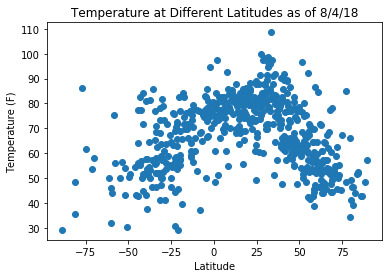

In [70]:
plt.scatter(end_lats, temps)
plt.title('Temperature at Different Latitudes as of 8/4/18')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temperature_v_latitude.png')

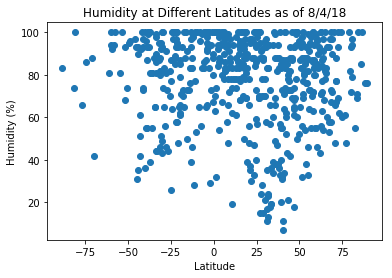

In [71]:
plt.scatter(end_lats, humid)
plt.title('Humidity at Different Latitudes as of 8/4/18')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('humidity_v_lattitude.png')

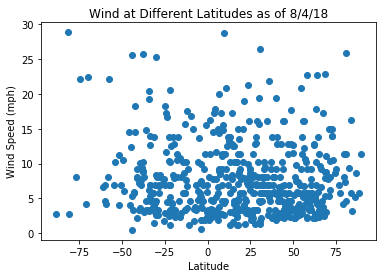

In [72]:
plt.scatter(end_lats, wind)
plt.title('Wind at Different Latitudes as of 8/4/18')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('windspeed_v_lattitude.png')

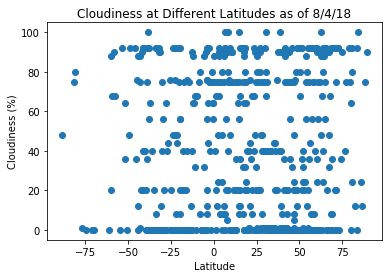

In [73]:
plt.scatter(end_lats, cloud)
plt.title('Cloudiness at Different Latitudes as of 8/4/18')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('cloudiness_v_lattitude.png')